# Import libraries

In [1]:
# import required libraries

import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np  # linear algebra

import matplotlib.pyplot as plt  # this is used for the plot the graph
%matplotlib inline

import seaborn as sns  # used for plot interactive graph
import warnings # check the warnings
warnings.filterwarnings("ignore") # filter the warning which is not as much important

from sklearn import preprocessing  # used for preprocessing on data



# Data Collection

In [2]:
# load data
df = pd.read_csv('covid_19_india.csv')
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0


In [3]:
#columns
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 9 columns):
Sno                         801 non-null float64
Date                        801 non-null object
Time                        801 non-null object
State/UnionTerritory        801 non-null object
ConfirmedIndianNational     801 non-null object
ConfirmedForeignNational    801 non-null object
Cured                       801 non-null float64
Deaths                      801 non-null float64
Confirmed                   801 non-null float64
dtypes: float64(4), object(5)
memory usage: 56.8+ KB


In [5]:
# check for null value
df.isnull().sum()

Sno                         5
Date                        5
Time                        5
State/UnionTerritory        5
ConfirmedIndianNational     5
ConfirmedForeignNational    5
Cured                       5
Deaths                      5
Confirmed                   5
dtype: int64

In [6]:
df.fillna(0,inplace=True)

In [7]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 806 entries, 0 to 805
Data columns (total 9 columns):
Sno                         806 non-null float64
Date                        806 non-null object
Time                        806 non-null object
State/UnionTerritory        806 non-null object
ConfirmedIndianNational     806 non-null object
ConfirmedForeignNational    806 non-null object
Cured                       806 non-null float64
Deaths                      806 non-null float64
Confirmed                   806 non-null float64
dtypes: float64(4), object(5)
memory usage: 56.8+ KB


In [9]:
# check for datatypes of features

df.dtypes

Sno                         float64
Date                         object
Time                         object
State/UnionTerritory         object
ConfirmedIndianNational      object
ConfirmedForeignNational     object
Cured                       float64
Deaths                      float64
Confirmed                   float64
dtype: object

In [10]:
#Number of unique values per column
Nunique = df.nunique()
Nunique = Nunique.sort_values()
Nunique

Time                          7
ConfirmedForeignNational     13
Deaths                       20
State/UnionTerritory         33
Cured                        44
ConfirmedIndianNational      63
Date                         72
Confirmed                   173
Sno                         802
dtype: int64

In [11]:
#check for junk value
for col in df:
    print(col ,':',df[col].unique())

Sno : [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.


In [12]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
801,0.0,0,0,0,0,0,0.0,0.0,0.0
802,0.0,0,0,0,0,0,0.0,0.0,0.0
803,0.0,0,0,0,0,0,0.0,0.0,0.0
804,0.0,0,0,0,0,0,0.0,0.0,0.0


In [13]:
df['ConfirmedForeignNational'].replace('-',0,inplace=True)

In [14]:
#check for junk value
for col in df:
    print(col ,':',df[col].unique())

Sno : [  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.


In [15]:
df.drop(['Sno'],axis=1,inplace=True)

In [16]:
# Statistic information of all numeric data

df.describe()

,Cured,Deaths,Confirmed
count,806.000000,806.000000,806.000000
mean,4.119107,1.326303,53.452854
std,10.209639,4.745077,118.004483
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.000000
50%,0.000000,0.000000,10.000000
75%,3.000000,1.000000,41.000000
max,117.000000,72.000000,1135.000000


In [17]:
#Total cases of corona in India
df['Total Cases'] = df['Cured'] + df['Deaths'] + df['Confirmed']
#Active cases of corona in India
df['Active Cases'] = df['Total Cases'] - df['Cured'] - df['Deaths']
df.head()


,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,Total Cases,Active Cases
0,30/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0,1.0
1,31/01/20,6:00 PM,Kerala,1,0,0.0,0.0,1.0,1.0,1.0
2,01/02/20,6:00 PM,Kerala,2,0,0.0,0.0,2.0,2.0,2.0
3,02/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0,3.0
4,03/02/20,6:00 PM,Kerala,3,0,0.0,0.0,3.0,3.0,3.0


# Visualization

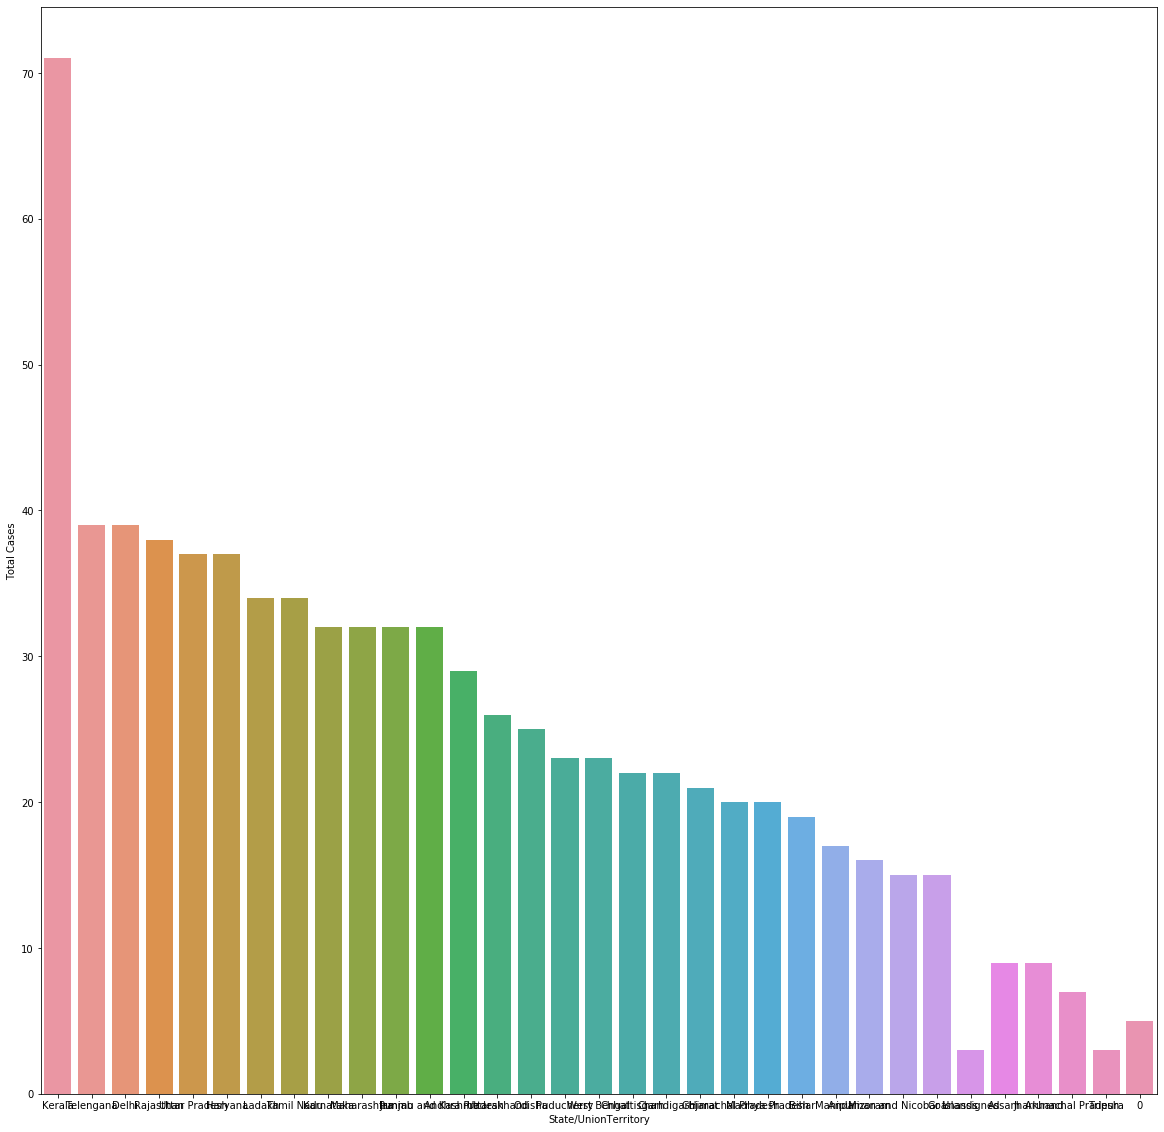

In [18]:
#Till yesterday in India
import datetime 
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
yesterday=yesterday.strftime('%d/%m/%y')
df1= df[df['Date']==yesterday]
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='State/UnionTerritory')
plt.ylabel('Total Cases')

plt.show()

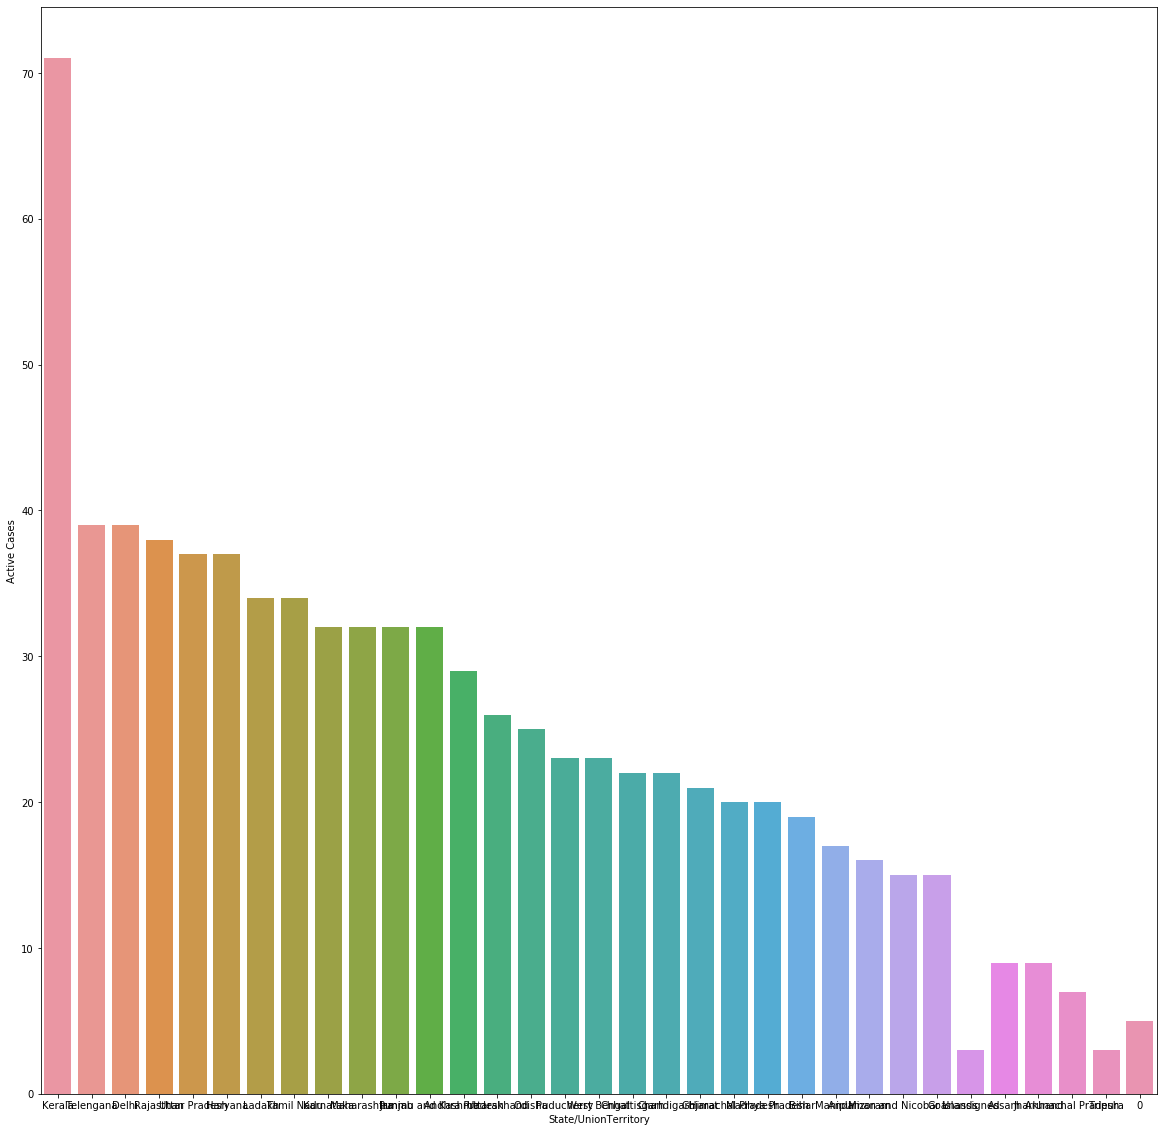

In [19]:


#Till yesterday Cases in India
df1= [df['Date']==yesterday]
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='State/UnionTerritory')
plt.ylabel('Active Cases')

plt.show()

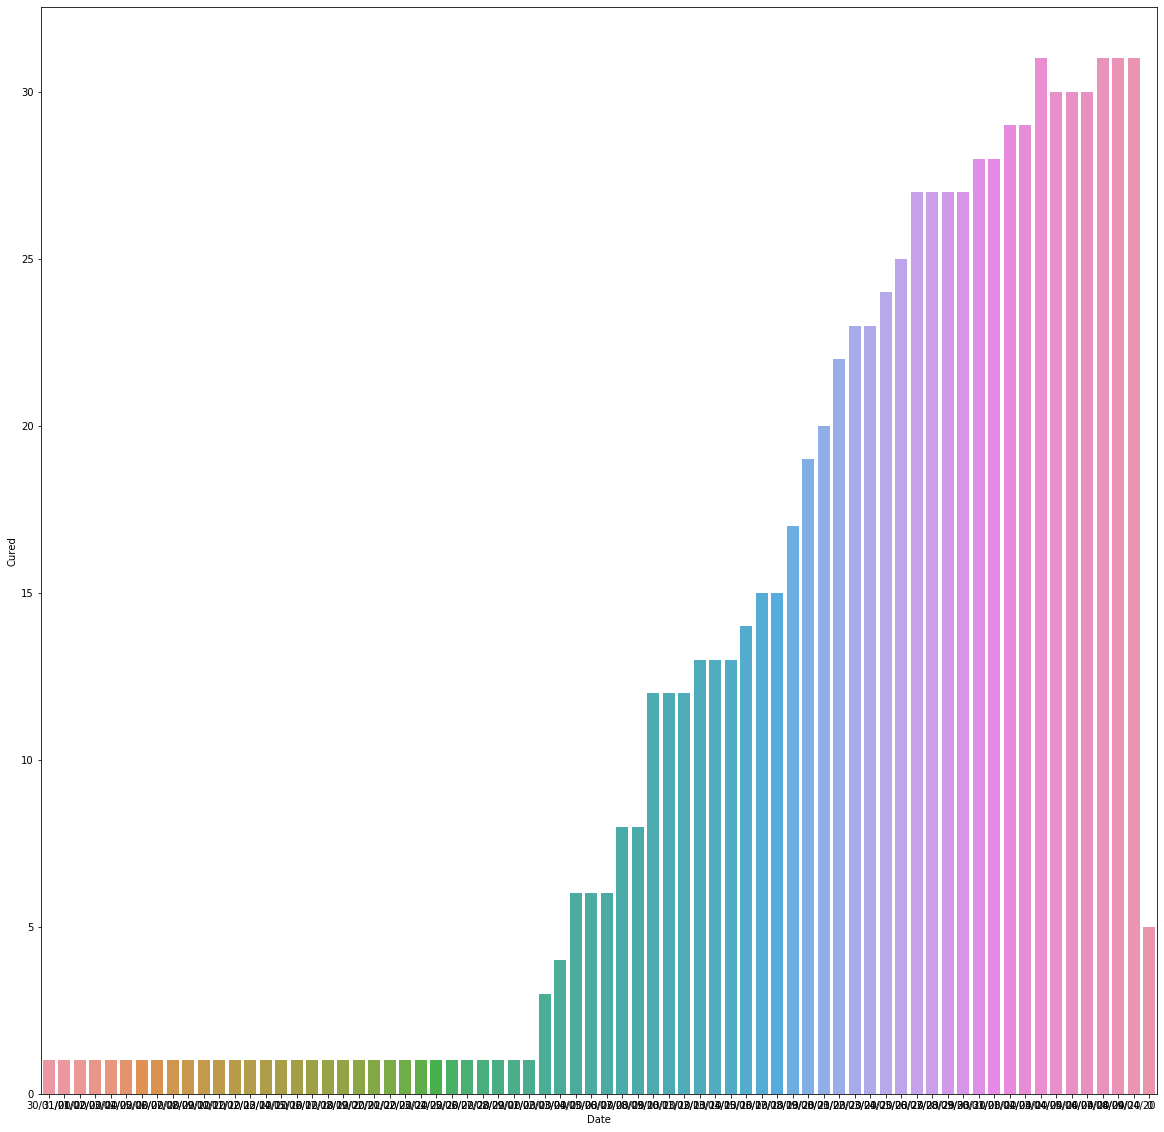

In [20]:
#Daily Cases in India Datewise
corona_data = df.groupby(['Date'])['Cured'].sum().reset_index().sort_values('Cured',ascending = True)
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='Date')
plt.ylabel('Cured')


plt.show()

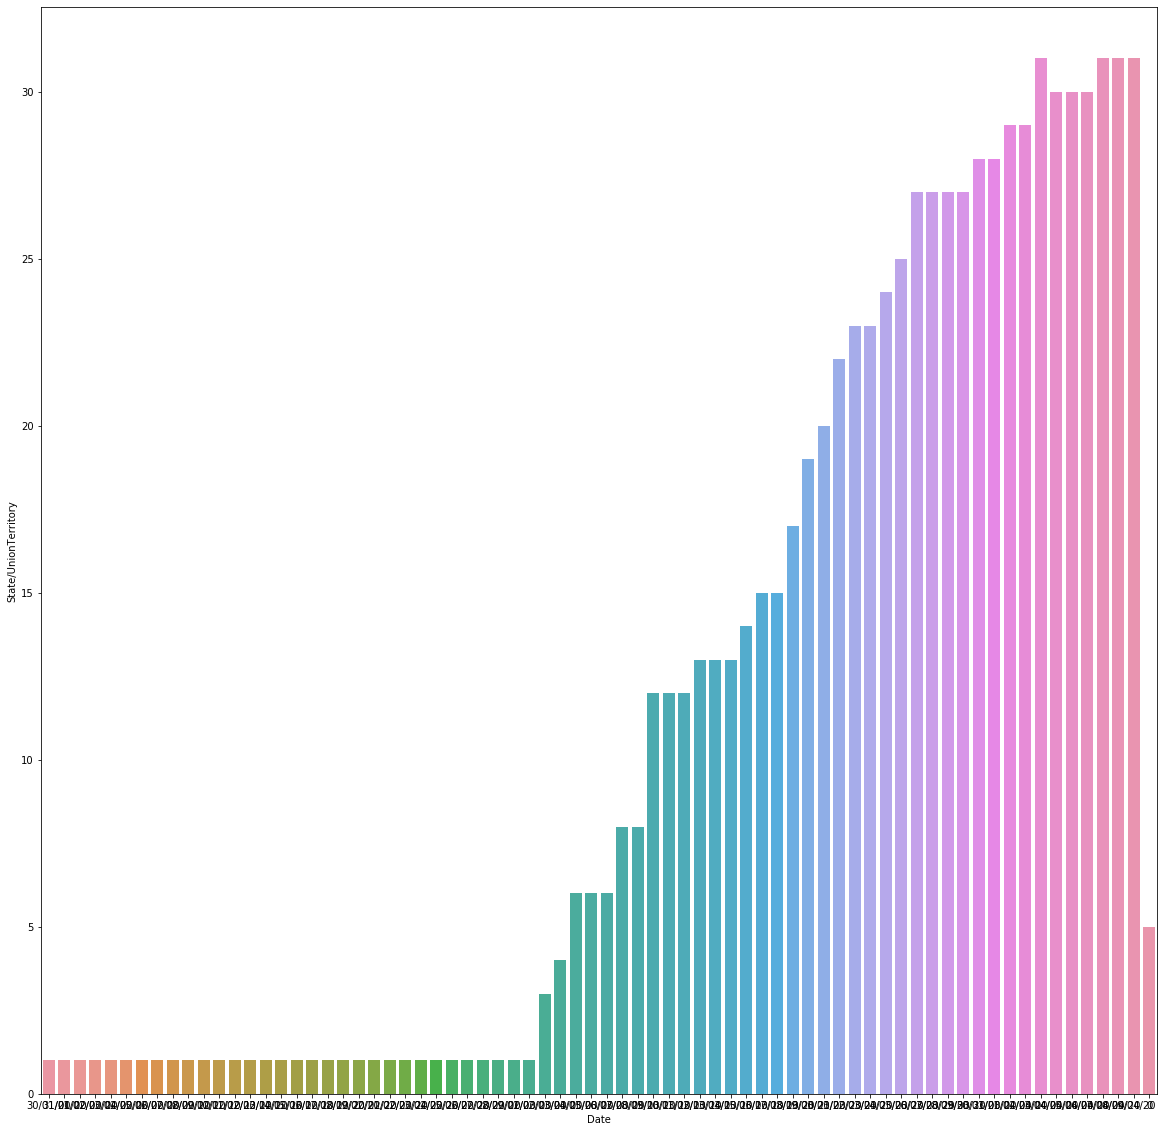

In [27]:
#Daily Cases in India Datewise
corona_data = df.groupby(['Date'])['Total Cases'].sum().reset_index().sort_values('Total Cases',ascending = True)
corona_data['Daily Cases'] = corona_data['Total Cases'].sub(corona_data['Total Cases'].shift())
corona_data['Daily Cases'].iloc[0] = corona_data['Total Cases'].iloc[0]
corona_data['Daily Cases'] = corona_data['Daily Cases'].astype(int)
plt.figure(figsize=(20,20))
sns.countplot(data=df,x='Date')
plt.ylabel('State/UnionTerritory')


plt.show()


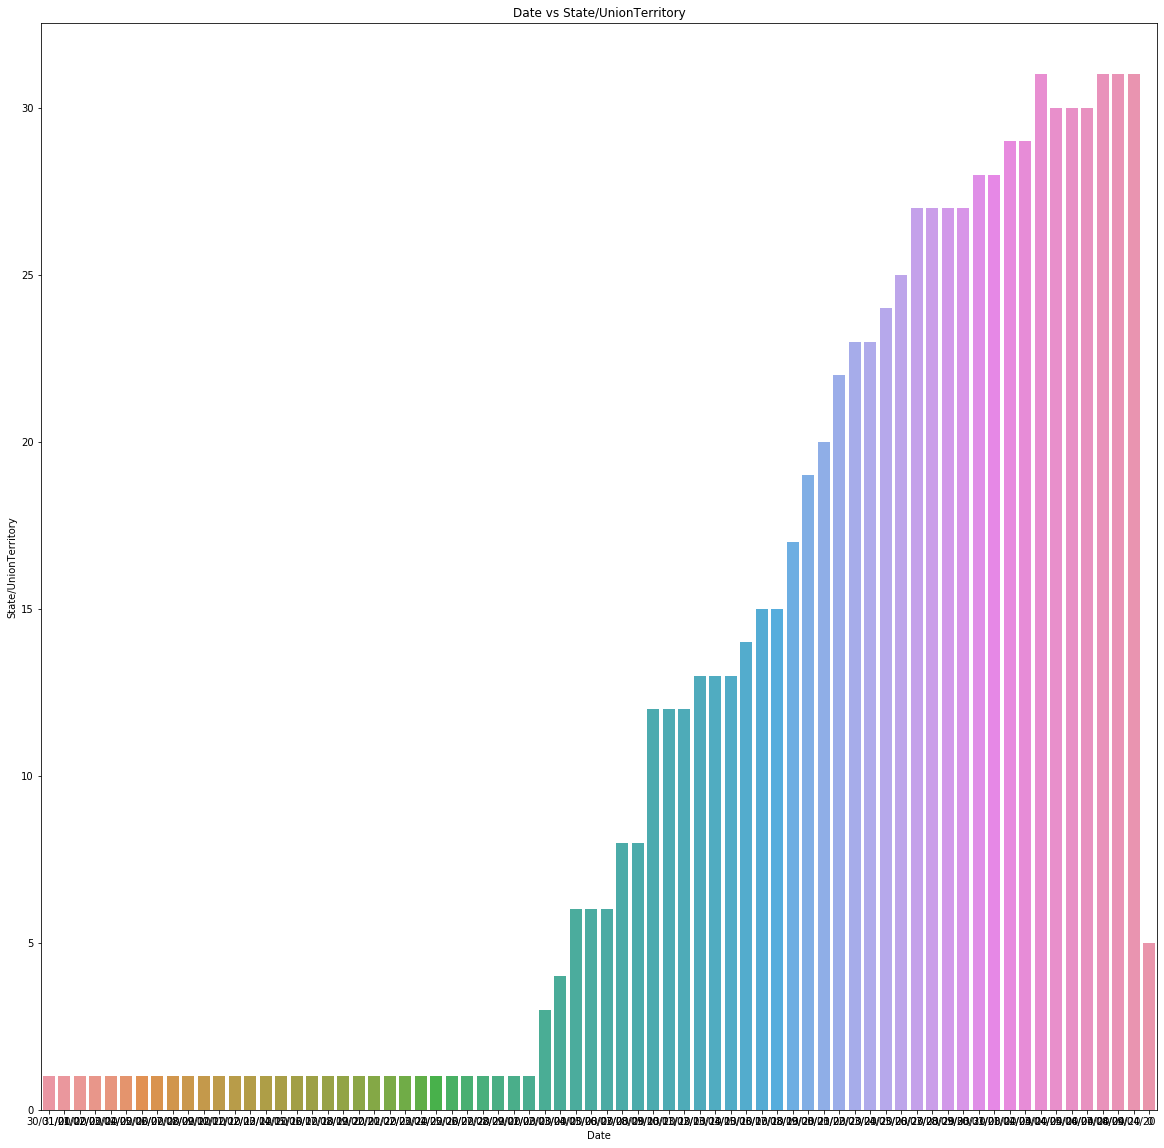

In [33]:
 #rating over the content

plt.figure(figsize=(20,20))
plt.title('Date vs State/UnionTerritory')
sns.countplot(data=df,x='Date')
plt.ylabel('State/UnionTerritory')


plt.show()

# Conclusion

1.The most common symptoms of COVID-19 are fever, tiredness, and dry cough. Some patients may have aches and pains, nasal congestion, runny nose, sore throat or diarrhea. These symptoms are usually mild and begin gradually. Some people become infected but don’t develop any symptoms and don't feel unwell.

2.from above data we analysis that as the day goes on increasing the virus spread is also increase.

3.So it mainly affected to the low immunity person and the person who got in contect to the number of people daily.

4.as in our country  population is very high so it take time to slow down.

5.It is increasing rapidely 

6.No of beds are less and our country has slum area more,croweded places is more so 21 day lockdown perform in spread of virus.ans last people travelled more to netive place that is also one reason